# Linear Regression

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


# Import csv

In [4]:
df=pd.read_csv('data/Salary.csv')

In [5]:
df.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

# Describe

In [6]:
df.describe()

YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Set X and Y

In [7]:
#Data preprocessing
x=df.iloc[:,:-1].values #remember iloc and loc[:,'column'] : means to select all rows
y=df.iloc[:,1].values

In [8]:
print(x,y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]] [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


# Using loc

In [17]:
#Data preprocessing
x=df.loc[:,'YearsExperience'].values #remember iloc and loc[:,'column'] : means to select all rows
y=df.loc[:,'Salary'].values

x=x.reshape(-1,1)

In [18]:
print(x,y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]] [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


# Split dataset

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
print(x_train.shape)
print(y_train.shape)

(24, 1)
(24,)


# Linear Regression

In [21]:
regresser=LinearRegression()

In [22]:
model=regresser.fit(x_train,y_train)

# Get Coefficient and Intercept

    y = coef_ * x + intercept_

In [23]:
print(model.coef_)
print(model.intercept_)

[9283.33150616]
26571.996373756083


# Predict on testm data

In [24]:
y_pred=model.predict(x_test)
print(y_pred)
print('******')
print(y_test)

[ 53493.65774161  56278.65719346  73916.98705515  46995.3256873
 102695.31472424  54421.99089222]
******
[ 56642.  54445.  66029.  39891. 113812.  60150.]


# Evaluate

In [28]:
from sklearn.metrics import r2_score
import numpy as np

In [32]:
r_squared = r2_score(y_test,y_pred)
print("The R2 error is :", r_squared)

The R2 error is : 0.9122777956704051


 91.2 % of the variance in the dependent variable (the target) can be explained by the independent variables (the features) in the regression model

# Predict custom

In [25]:
#predict future
custom_value=np.array([[13]])
print(model.predict(custom_value))

[147255.30595379]


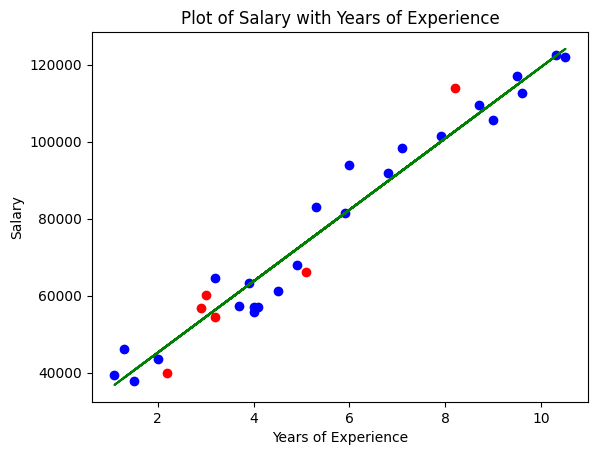

In [26]:
#plotting
plt.title("Plot of Salary with Years of Experience")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(x_train,y_train,c='b')
plt.scatter(x_test,y_test,c='r')
plt.plot(x_train,regresser.predict(x_train),c='g')